In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=10, frameon=True, figsize=(2, 2), transparent=False, format="pdf")

-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bioservices         1.7.11
boto3               1.20.24
botocore            1.23.24
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs     

In [3]:
Mock_Heart_D4PI_sc = sc.read_10x_h5('./../../../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D4PI_sc = sc.read_10x_h5('./../../../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D7PI_sc = sc.read_10x_h5('./../../../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D7PI_sc = sc.read_10x_h5('./../../../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5')
Mock_Heart_D10PI_sc = sc.read_10x_h5('./../../../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5')
T1L_WT_Heart_D10PI_sc = sc.read_10x_h5('./../../../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5')

Mock_Heart_D4PI_sc.var_names_make_unique()
T1L_WT_Heart_D4PI_sc.var_names_make_unique()
Mock_Heart_D7PI_sc.var_names_make_unique()
T1L_WT_Heart_D7PI_sc.var_names_make_unique()
Mock_Heart_D10PI_sc.var_names_make_unique()
T1L_WT_Heart_D10PI_sc.var_names_make_unique()

reading ./../../../scData/Heart_Mock_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_T1L_D4PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_Mock_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_T1L_D7PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_Mock_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading ./../../../scData/Heart_T1L_D10PI/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [67]:
samples = ["Heart_Mock_D4PI", "Heart_T1L-WT_D4PI", "Heart_Mock_D7PI", "Heart_T1L-WT_D7PI", "Heart_Mock_D10PI", "Heart_T1L-WT_D10PI"]


In [68]:
heart_infection_sc = Mock_Heart_D4PI_sc.concatenate(T1L_WT_Heart_D4PI_sc, Mock_Heart_D7PI_sc, T1L_WT_Heart_D7PI_sc,
                                                             Mock_Heart_D10PI_sc, T1L_WT_Heart_D10PI_sc,
                                                    batch_key= "sample", batch_categories=samples,
                                                    index_unique="-")

In [69]:
heart_infection_sc.obs_names_make_unique()
heart_infection_sc.var_names_make_unique()
print(heart_infection_sc.shape)

(37691, 54848)


In [70]:
reoviral_genes = [name for name in heart_infection_sc.var_names if name.startswith('Reo')]
print(reoviral_genes)

viral_expression = heart_infection_sc[:,reoviral_genes].to_df()
viral_expression.columns = [x.split("_")[1] for x in viral_expression.columns]
reoviral_genes_indicator = np.in1d(heart_infection_sc.var_names, reoviral_genes)
heart_infection_sc = heart_infection_sc[:, ~reoviral_genes_indicator]
heart_infection_sc.var_names = [name.split("_")[1] for name in heart_infection_sc.var_names]
heart_infection_sc.obs = heart_infection_sc.obs.join(viral_expression.astype(int))
print(heart_infection_sc.shape)

['ReoT1L_T1LReoS1', 'ReoT1L_T1LReoS2', 'ReoT1L_T1LReoS3', 'ReoT1L_T1LReoS4', 'ReoT1L_T1LReoM1', 'ReoT1L_T1LReoM2', 'ReoT1L_T1LReoM3', 'ReoT1L_T1LReoL1', 'ReoT1L_T1LReoL2', 'ReoT1L_T1LReoL3']


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(37691, 54838)


In [71]:
sc.pp.filter_cells(heart_infection_sc, min_counts=1)
sc.pp.filter_genes(heart_infection_sc, min_cells=1)

filtered out 1 cells that have less than 1 counts
filtered out 21699 genes that are detected in less than 1 cells


In [72]:
heart_infection_sc.var['mt'] = heart_infection_sc.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(heart_infection_sc, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [73]:
heart_infection_sc.obs['total_viral'] = viral_expression.sum(axis=1).astype(int)
heart_infection_sc.obs['pct_viral'] = ((heart_infection_sc.obs['total_viral']) / (heart_infection_sc.obs['total_viral'] + heart_infection_sc.obs['total_counts']))

In [74]:
heart_infection_sc.obs["stage"] = [x.split("_")[2] for x in heart_infection_sc.obs["sample"]]
heart_infection_sc.obs["state"] = [x.split("_")[1] for x in heart_infection_sc.obs["sample"]]
heart_infection_sc.obs["stage"] = heart_infection_sc.obs["stage"].astype("category")
heart_infection_sc.obs["state"] = heart_infection_sc.obs["state"].astype("category")
heart_infection_sc.obs["stage"].cat.reorder_categories(new_categories=["D4PI", "D7PI", "D10PI"], inplace = True)
heart_infection_sc.obs["state"].cat.reorder_categories(new_categories=["Mock", "T1L-WT"], inplace = True)
heart_infection_sc.obs["condition"] = [heart_infection_sc.obs["state"][i] + "_" + heart_infection_sc.obs["stage"][i] for i in range(heart_infection_sc.shape[0])]
heart_infection_sc.obs["condition"] = heart_infection_sc.obs["condition"].astype("category")
heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "Mock_D7PI", "Mock_D10PI", "T1L-WT_D4PI", "T1L-WT_D7PI", "T1L-WT_D10PI"], inplace = True)

<ipython-input-74-445736d088fa>:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  heart_infection_sc.obs["stage"].cat.reorder_categories(new_categories=["D4PI", "D7PI", "D10PI"], inplace = True)
<ipython-input-74-445736d088fa>:6: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  heart_infection_sc.obs["state"].cat.reorder_categories(new_categories=["Mock", "T1L-WT"], inplace = True)
<ipython-input-74-445736d088fa>:9: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  heart_infection_sc.obs["condition"].cat.reorder_categories(new_c

... storing 'feature_types' as categorical
... storing 'genome' as categorical


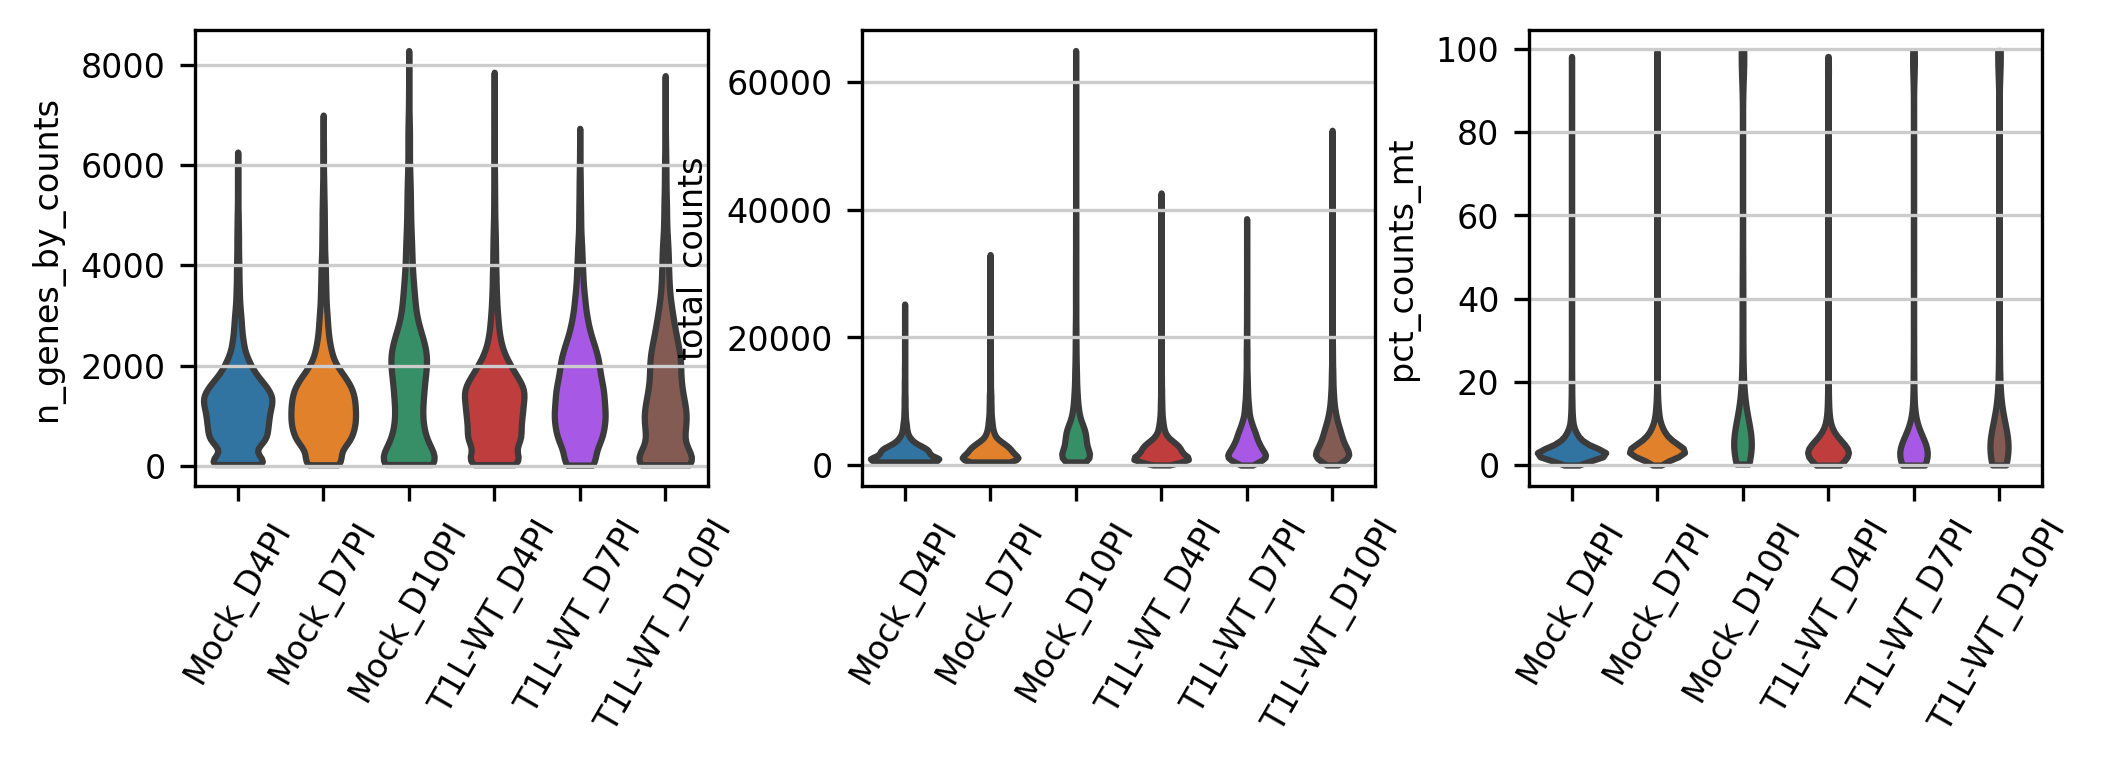

In [75]:
sc.settings.set_figure_params(dpi=150, dpi_save= 300, fontsize=8, frameon=True, figsize=(3, 2), transparent=False, format="pdf")
sc.pl.violin(heart_infection_sc, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             stripplot=False, scale="area", groupby = "condition", rotation=60)

In [76]:
np.sum(heart_infection_sc.obs["total_viral"])

74

In [77]:
heart_infection_sc = heart_infection_sc[heart_infection_sc.obs.pct_counts_mt < 25, :]
print(heart_infection_sc.shape)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [79]:
sc.pp.filter_cells(heart_infection_sc, min_genes=200)
sc.pp.filter_genes(heart_infection_sc, min_cells=10)
print(heart_infection_sc.shape)

filtered out 3527 cells that have less than 200 genes expressed


Trying to set attribute `.obs` of view, copying.


filtered out 10382 genes that are detected in less than 10 cells


In [81]:
heart_infection_sc.obs["condition"].value_counts()

Mock_D7PI       7096
Mock_D4PI       6596
T1L-WT_D4PI     5970
T1L-WT_D7PI     5086
Mock_D10PI      3483
T1L-WT_D10PI    3453
Name: condition, dtype: int64

In [ ]:
# heart_infection_sc.write_h5ad("./../pyobjs_github/heart_infection_sc_raw_counts.h5ad")

In [82]:
sc.pp.normalize_total(heart_infection_sc, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [83]:
sc.pp.log1p(heart_infection_sc)

In [84]:
sc.pp.highly_variable_genes(heart_infection_sc, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:05)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


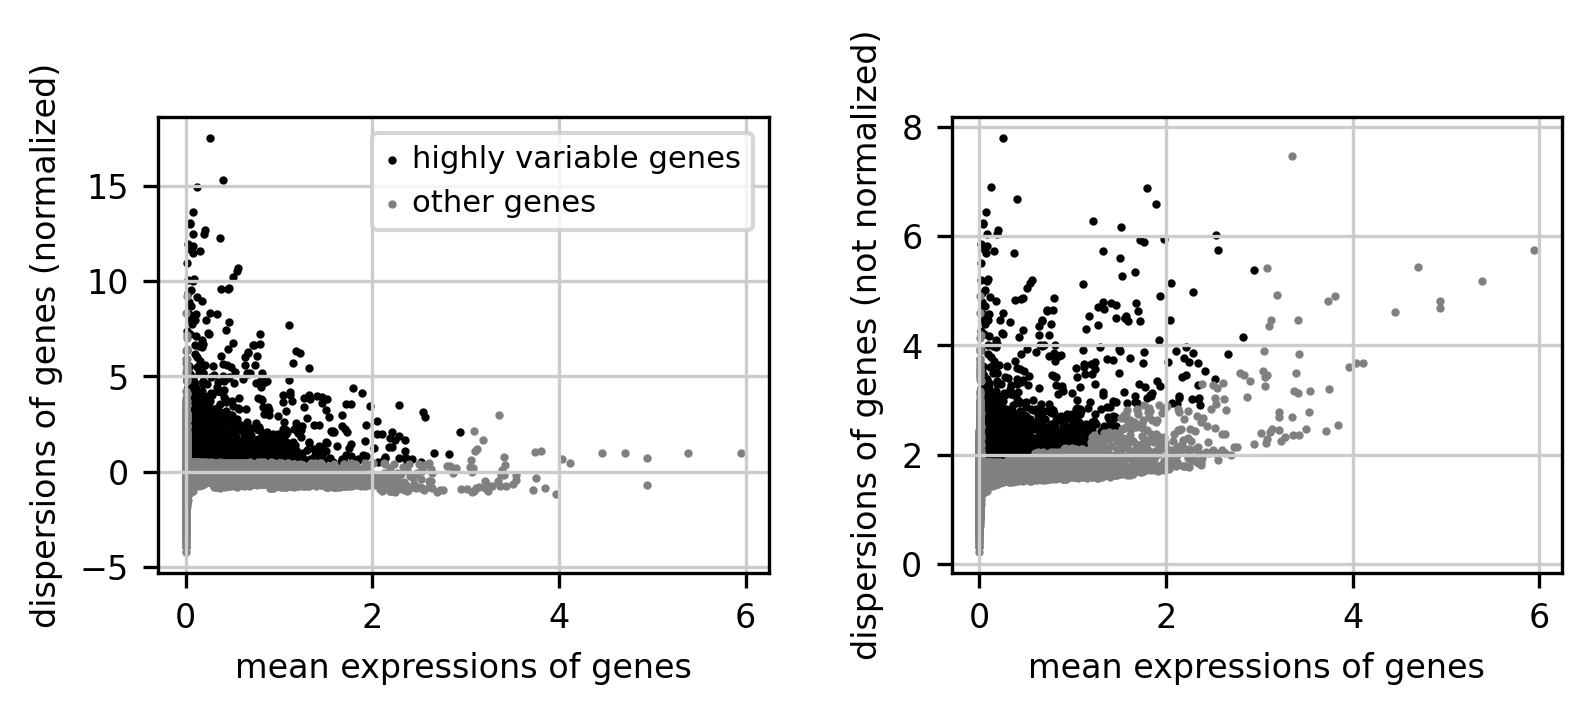

In [85]:
sc.pl.highly_variable_genes(heart_infection_sc, )

In [88]:
s_genes = list(pd.read_csv("./../../../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [89]:
sc.tl.score_genes_cell_cycle(heart_infection_sc, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    finished: added
    'S_score', score of gene set (adata.obs).
    503 total control genes are used. (0:00:01)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    543 total control genes are used. (0:00:01)
-->     'phase', cell cycle phase (adata.obs)


In [90]:
heart_infection_sc.raw = heart_infection_sc
heart_infection_sc = heart_infection_sc[:, heart_infection_sc.var.highly_variable]

In [91]:
sc.pp.regress_out(heart_infection_sc, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)

regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:00:15)


In [92]:
sc.pp.scale(heart_infection_sc, max_value=10)

In [94]:
sc.tl.pca(heart_infection_sc, svd_solver = "arpack", random_state=0)

computing PCA
    on highly variable genes


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


    with n_comps=50
    finished (0:00:07)


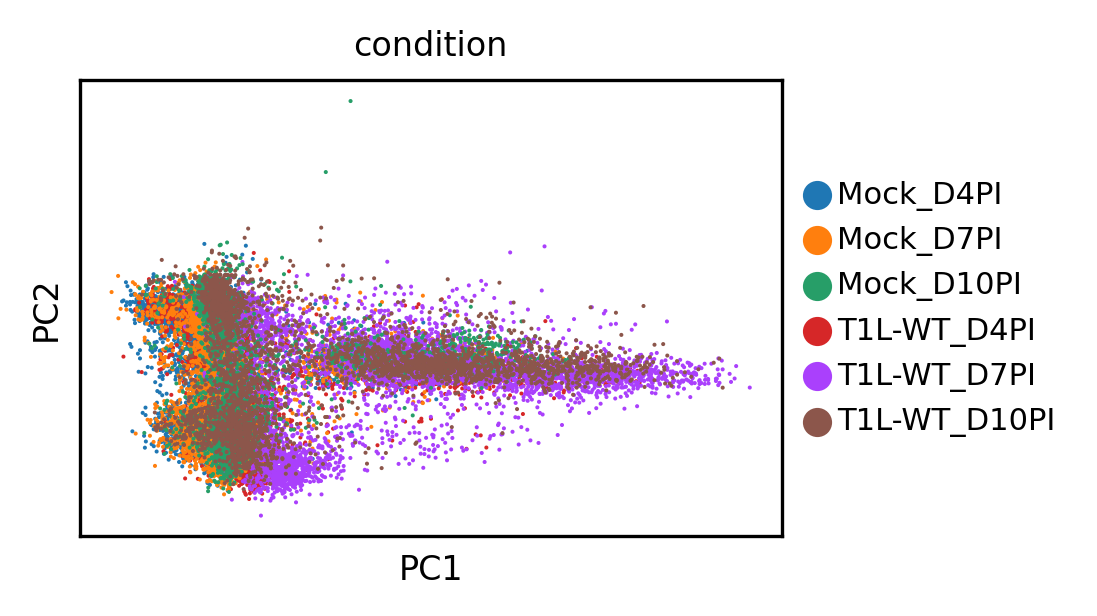

In [95]:
sc.pl.pca(heart_infection_sc, color = ["condition"])

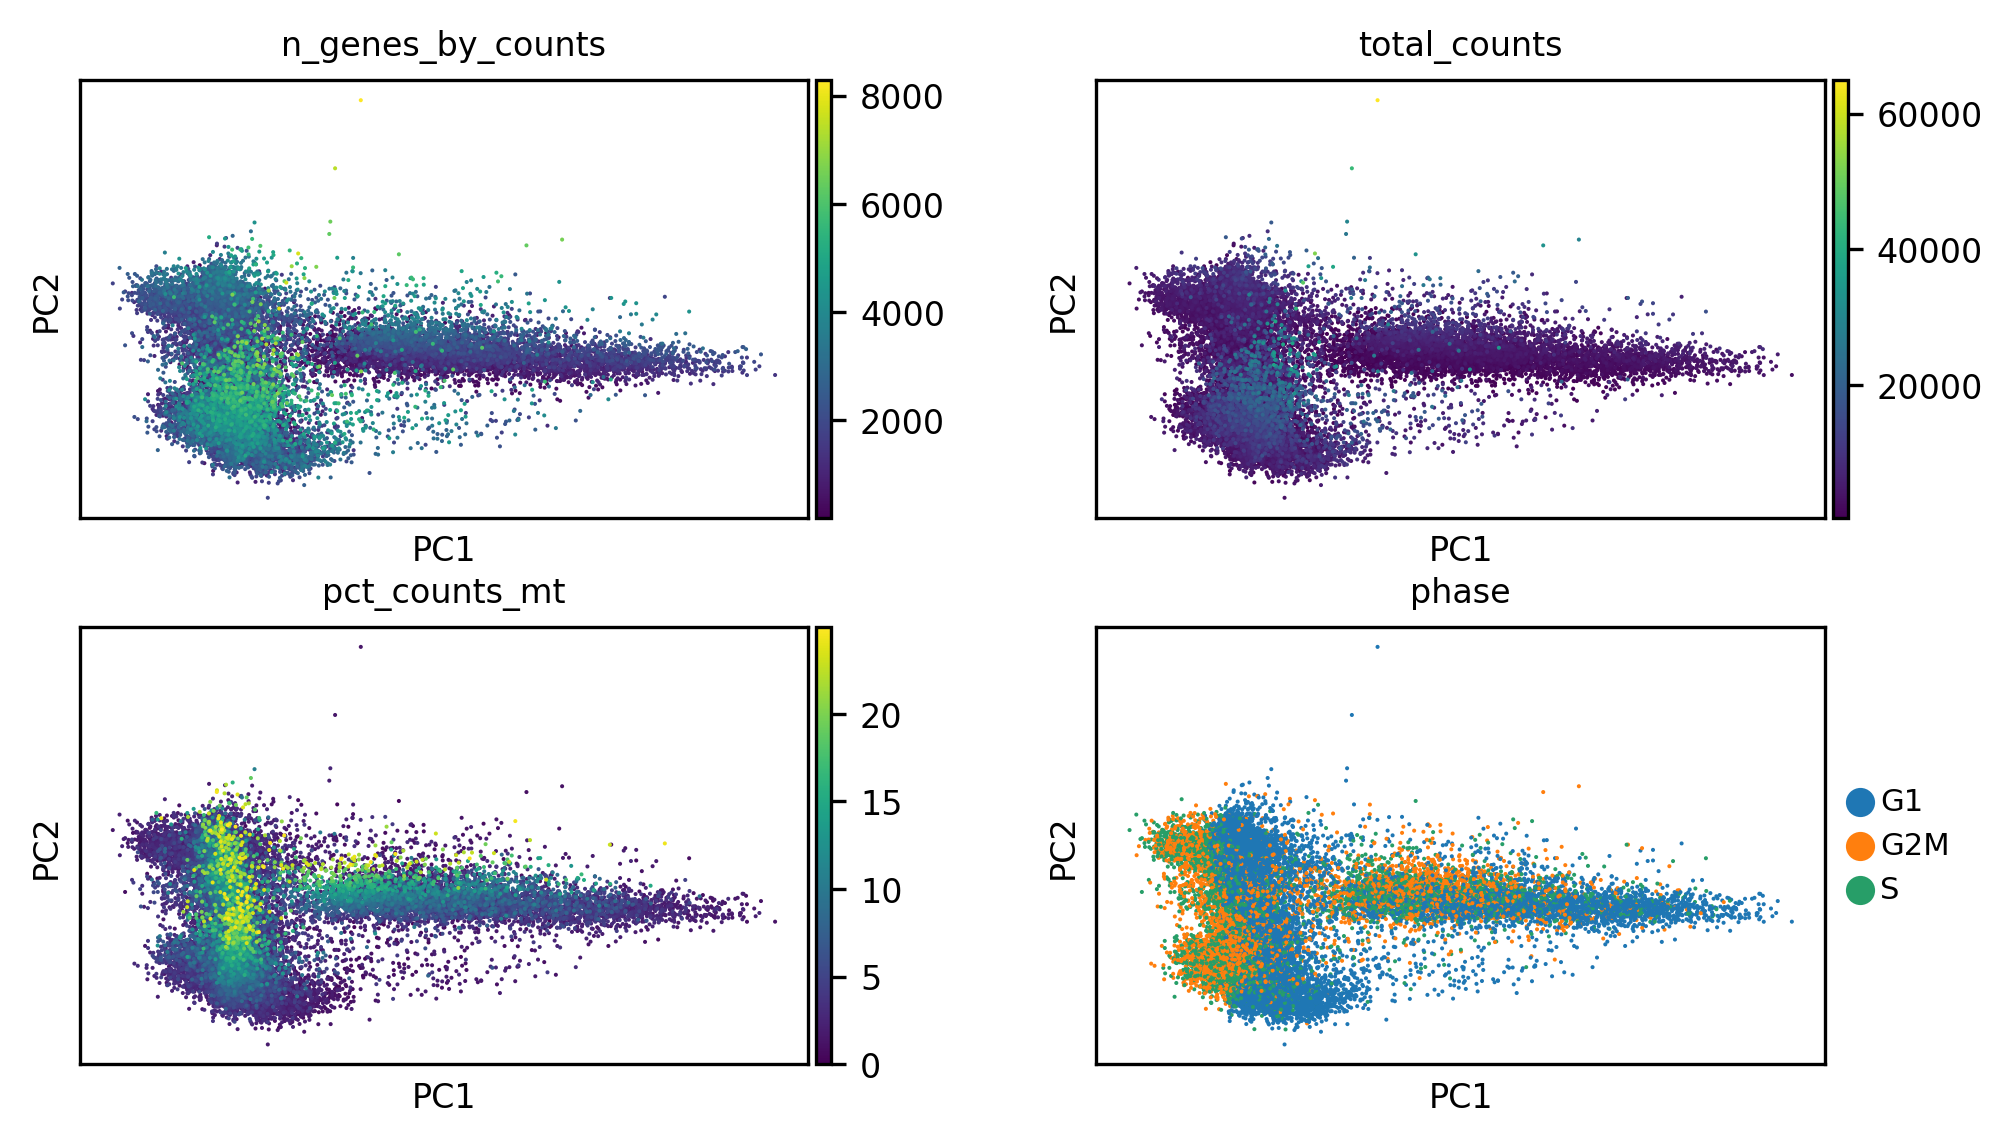

In [96]:
sc.pl.pca(heart_infection_sc, color = ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'phase'], ncols=2)

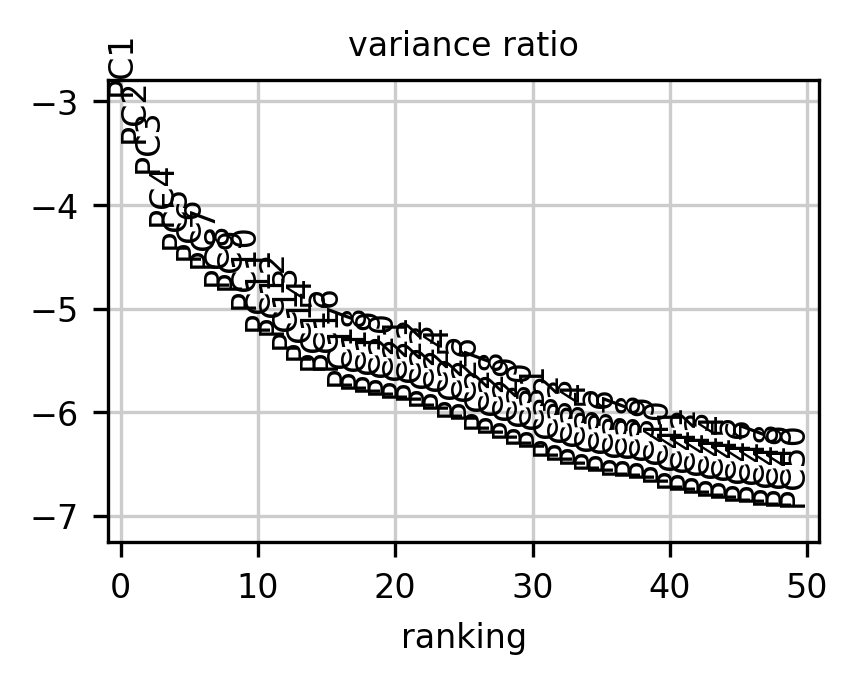

In [97]:
sc.pl.pca_variance_ratio(heart_infection_sc, n_pcs = 50, log=True)

In [98]:
heart_infection_sc.obsm["X_pca"]

array([[-3.1915047e+00, -1.1429009e+00,  2.9936072e-01, ...,
        -2.0318270e+00, -1.4311357e+00,  4.0696702e+00],
       [-5.3046675e+00, -9.5140057e+00,  9.5467138e-01, ...,
        -5.6466573e-01,  1.1129506e-02,  7.5845093e-01],
       [-1.0218928e+01, -7.1915784e+00, -6.7328997e+00, ...,
         4.6663499e-01,  1.1892640e-01, -1.3438011e+00],
       ...,
       [ 1.6761824e+01,  2.4328485e+00,  2.2510210e+01, ...,
         2.0592628e-01, -3.9777162e+00,  5.0848323e-01],
       [ 9.0334911e+00,  2.8495998e+00,  1.7325777e+01, ...,
         1.2464668e+00, -2.0412796e+00,  1.2192082e+00],
       [-5.7723460e+00,  9.7399502e+00, -6.1046481e-01, ...,
         6.4214909e-01,  1.3159909e+00, -3.4980021e-02]], dtype=float32)

In [99]:
sc.pp.neighbors(heart_infection_sc, n_pcs=20)

computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:29)


In [100]:
sc.tl.umap(heart_infection_sc)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:17)


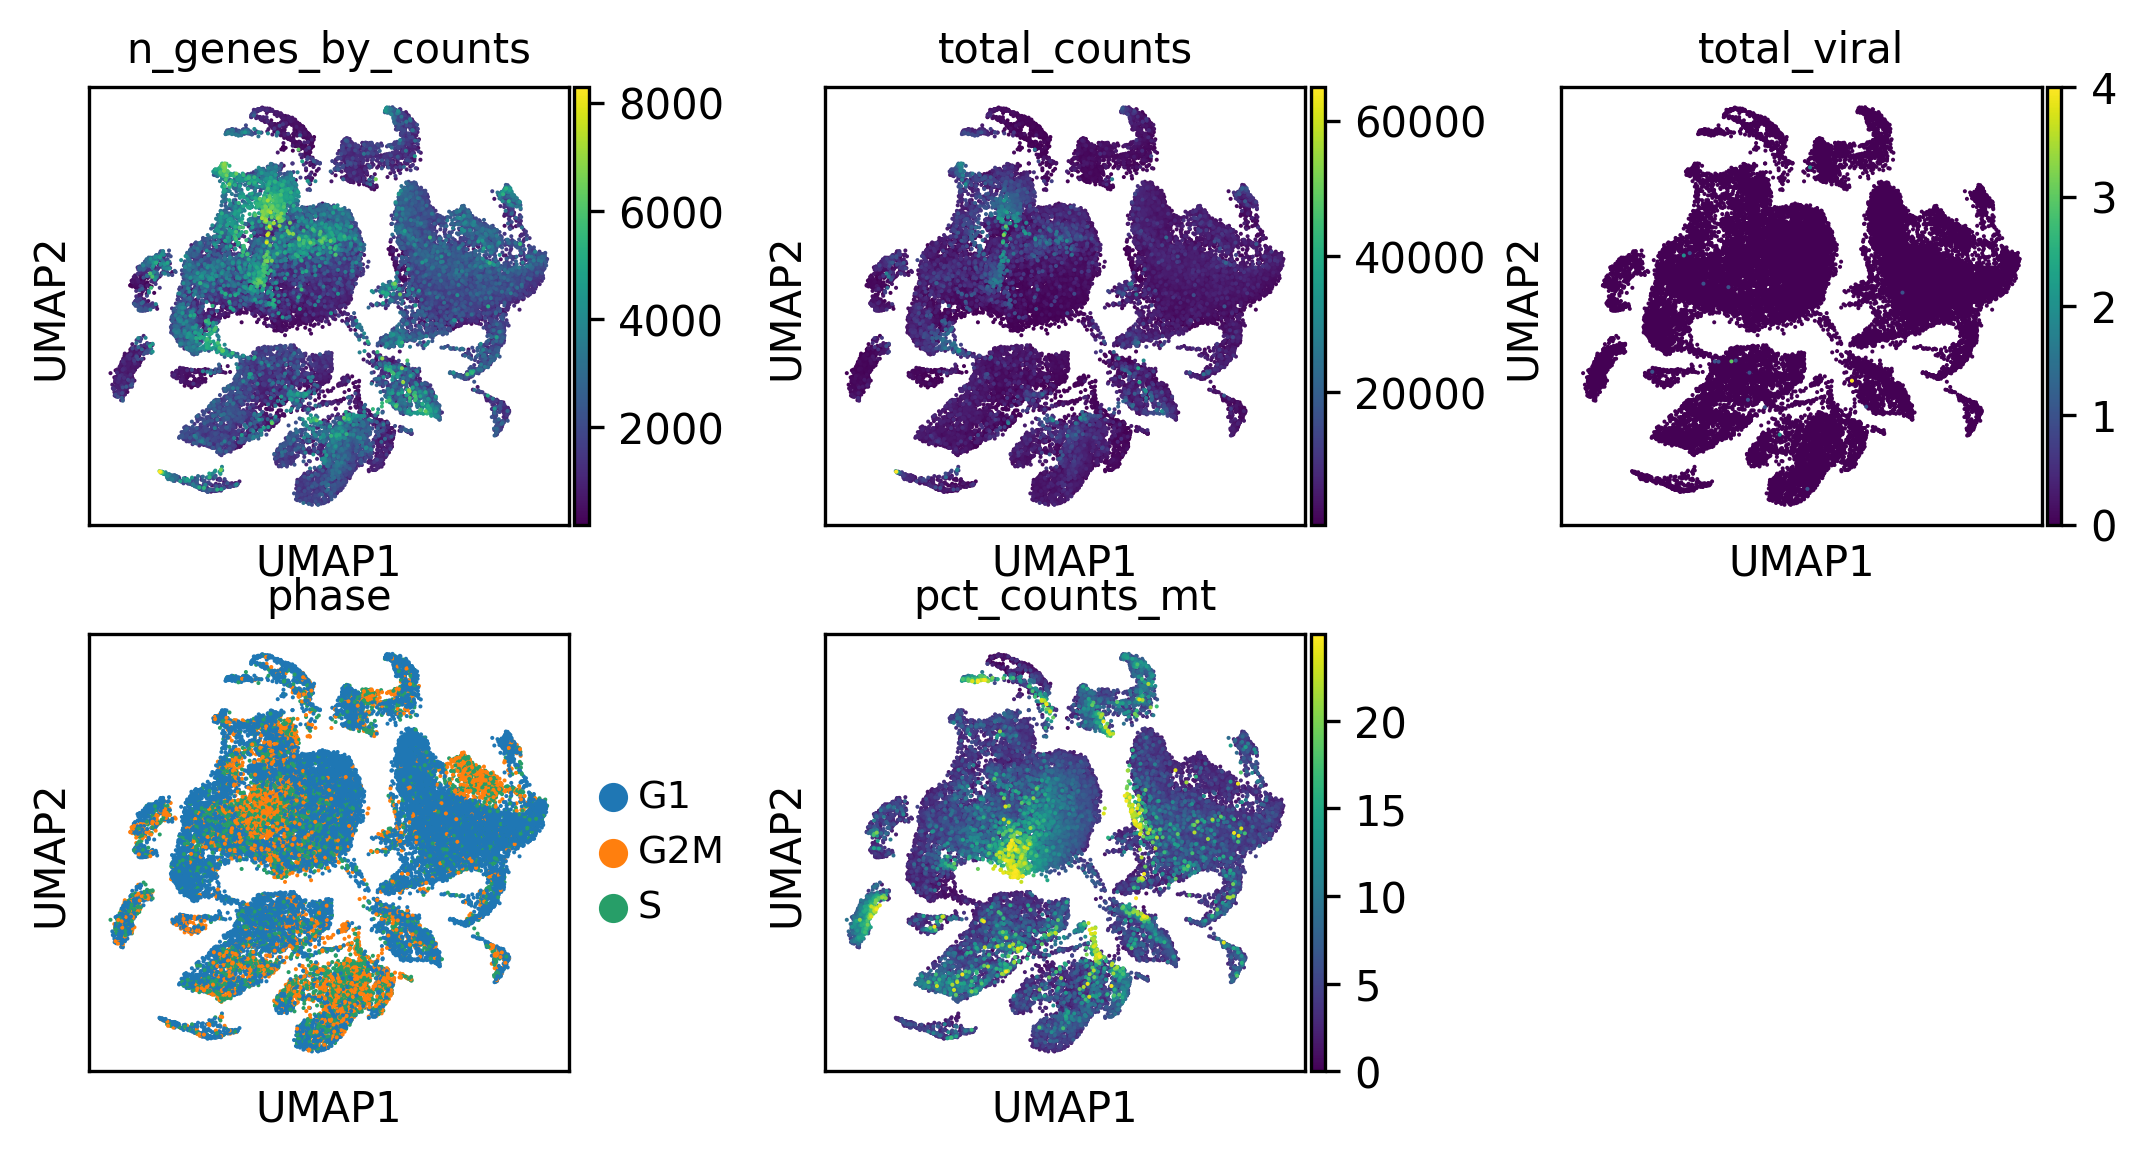

In [104]:
sc.pl.umap(heart_infection_sc, color = ['n_genes_by_counts', 'total_counts', 'total_viral', "phase", "pct_counts_mt"], ncols=3)

In [105]:
sc.tl.embedding_density(heart_infection_sc, groupby = "condition")

computing density on 'umap'
--> added
    'umap_density_condition', densities (adata.obs)
    'umap_density_condition_params', parameter (adata.uns)


<ipython-input-106-6e819651fa48>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)


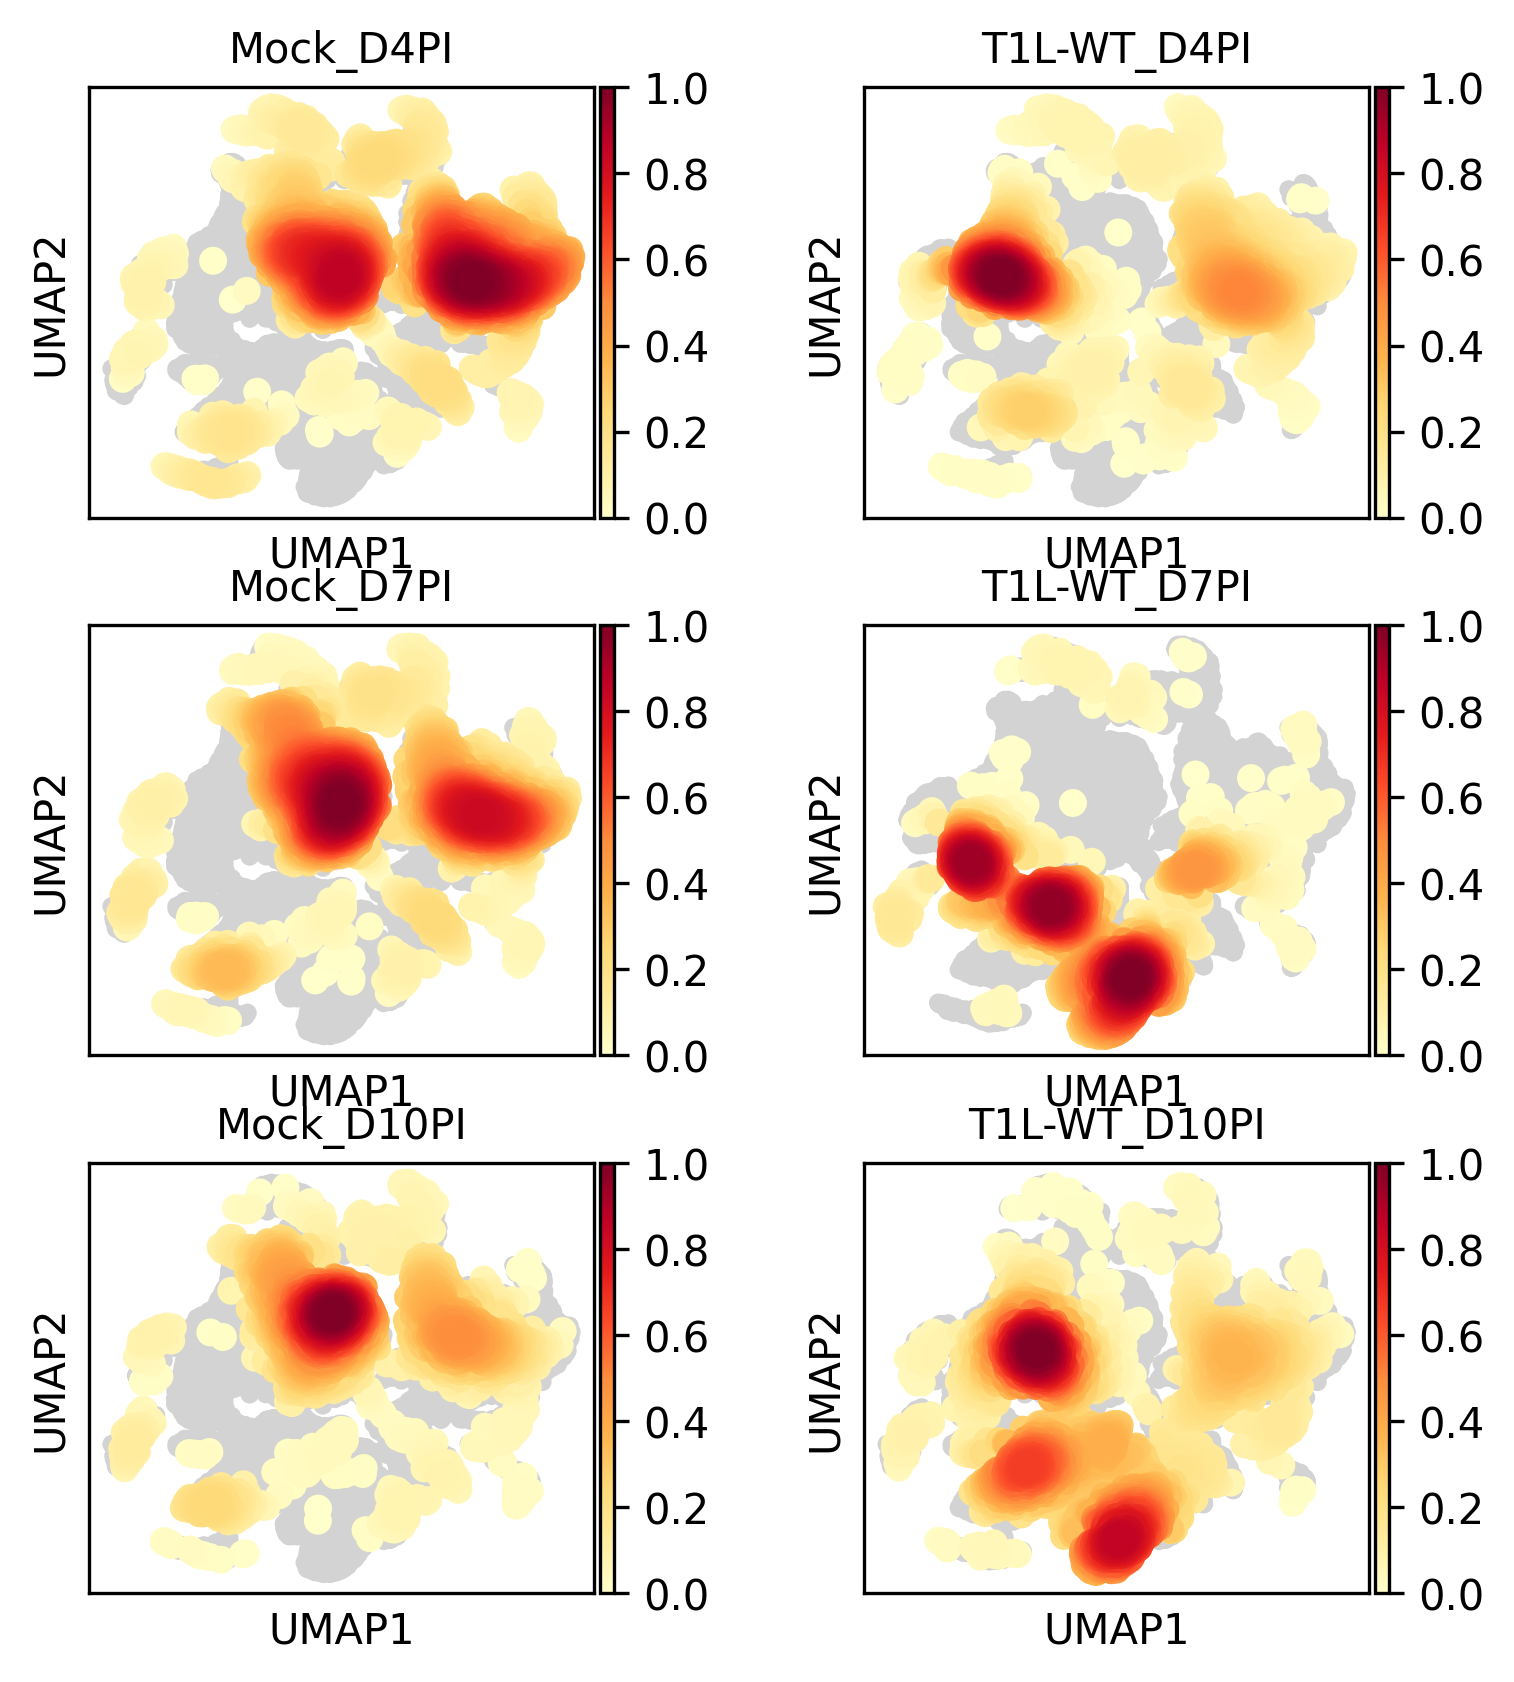

In [106]:
heart_infection_sc.obs["condition"].cat.reorder_categories(new_categories=["Mock_D4PI", "T1L-WT_D4PI",  "Mock_D7PI",  "T1L-WT_D7PI",  "Mock_D10PI", "T1L-WT_D10PI"], inplace = True)
sc.pl.embedding_density(heart_infection_sc, groupby = "condition", ncols=2) 

In [107]:
sc.tl.leiden(heart_infection_sc, key_added="leiden_0.5", resolution = 0.5)
sc.tl.leiden(heart_infection_sc, key_added="leiden_0.3", resolution = 0.3)
sc.tl.leiden(heart_infection_sc, key_added="leiden_0.1", resolution = 0.1)

running Leiden clustering
    finished: found 24 clusters and added
    'leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:01)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.1', the cluster labels (adata.obs, categorical) (0:00:02)


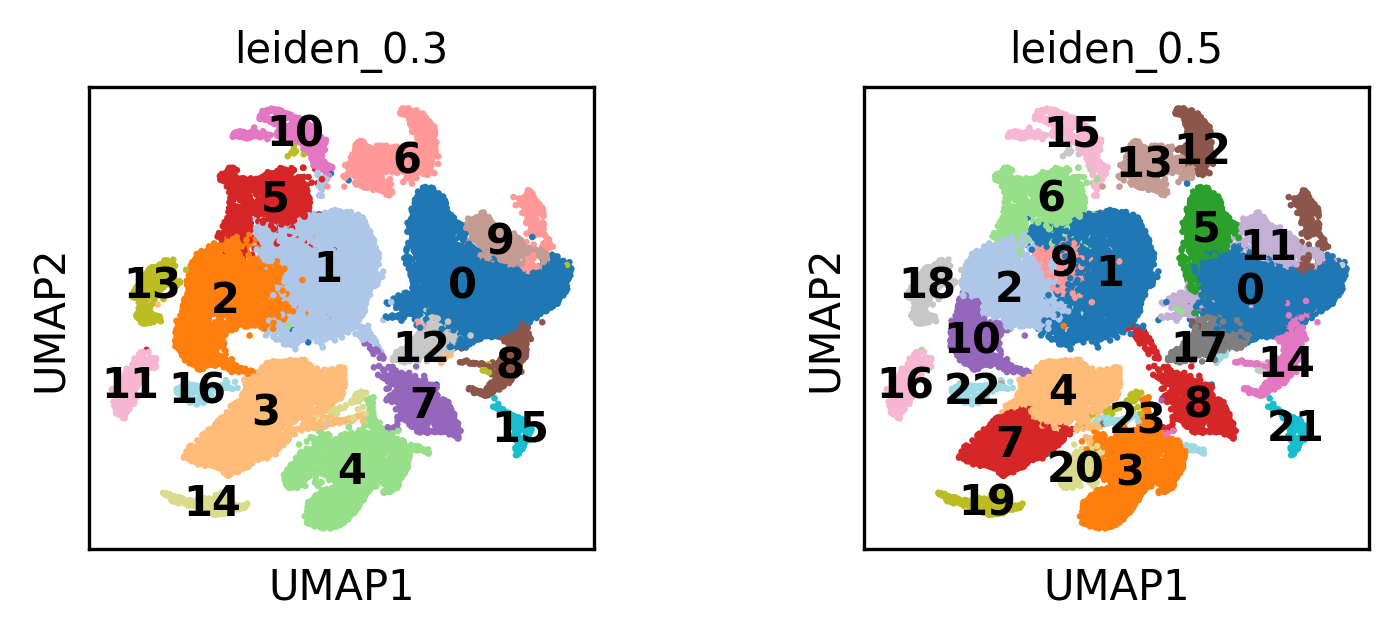

In [108]:
sc.pl.umap(heart_infection_sc, color = ['leiden_0.3', 'leiden_0.5'], legend_loc='on data', size=10, palette="tab20")

In [109]:
sc.tl.rank_genes_groups(heart_infection_sc, 'leiden_0.3', method='wilcoxon', key_added='rank_genes_groups_leiden_0.3')
sc.tl.rank_genes_groups(heart_infection_sc, 'leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_leiden_0.3']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:00)
ranking genes
    finished: added to `.uns['rank_genes_groups_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:09)


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:3

In [110]:
pd.DataFrame(heart_infection_sc.uns['rank_genes_groups_leiden_0.5']['names']).head(20)

0        1        2         3         4        5         6       7  \
0    Col3a1    Fabp4     Bst2     Trbc2    Fcer1g    Mfap5      Rgs5    C1qa   
1    Col1a1     Cd36   Ifitm3    Ms4a4b      Ctss   Clec3b     Abcc9    C1qb   
2    Col1a2     Cav1    Fabp4      Cd3d    Tyrobp      Dcn    Higd1b    C1qc   
3       Dcn     Cdh5     Ly6a      Cd3g    Lgals3     Fbn1     Kcnj8     Pf4   
4       Lum  Gpihbp1    Egfl7      Cd52     Cebpb    Fstl1  Ndufa4l2    Apoe   
5     Mfap4     Mgll    Iigp1    Coro1a      Cyba   Sema3c   Colec11  Fcer1g   
6       Bgn  Sparcl1    H2-K1   Ptprcap      Cd52    Pcsk6    Pdgfrb    Lgmn   
7     Fstl1   Col4a1  Gpihbp1      Rac2     Prdx5  Adamts5    Steap4  Tyrobp   
8     Postn      Kdr     Cav1      Nkg7      Spi1      Gsn     Sept4    Ftl1   
9       Dpt   Cavin2    H2-D1     Ptprc      Ctsc      Dpt       Vtn    Ctsc   
10  Col14a1  Tspan13      B2m   Arhgdib      Lyz2     Aspn   Gm13889    Ctsb   
11      Mdk     Cd93    Rsad2      Trac     Plac8    Timp2    Apold1    Fth1   
12   Col6a1   Pecam1     Cd36    Tmsb4x      Lst1   Col3a1     Itga1    Lyz2   
13     Rbp1    Cldn5     Gbp7      Ccl5    Ms4a6c    Itih5    Cox4i2    Aif1   
14   Igfbp7    Gng11     Ly6e      Gzmb      Ftl1      Lum     Mfge8  Tmsb4x   
15     Aspn   Col4a2    Icam2  AW112010    Ms4a4c    Postn      Mgll    Ctss   
16   Col5a1    Egfl7     Rgcc    Ms4a6b  Ifi27l2a   S100a6       Nes   Csf1r   
17      Mgp     Kitl    Isg15  Sh3bgrl3      Fth1    Fbln2   Sparcl1  Laptm5   
18    Mfap5     Tcf4    Gng11    Epsti1       B2m    Itm2a      Gjc1    Dab2   
19      Gsn    Tcf15     Cdh5       Lck      Ctsb      Axl     Epas1   Rgs10   

          8              9  ...             14       15       16        17  \
0     Hmcn1          Stmn1  ...            Bgn    Tnni3     Ighm  Serping1   
1    Tm4sf1          H2afz  ...            Dcn    Tnnt2     Ly6d    Col1a1   
2      Ece1          Hmgb2  ...            Mgp     Tpm1     Cd74    Col3a1   
3       Eng          Fabp4  ...            Vim    Actc1     Igkc     Iigp1   
4       H19           Ptma  ...  1500015O10Rik  Slc25a4    Cd79b    Pcolce   
5      Emcn          Top2a  ...         Col5a2    Tnnc1    Cd79a  Ifi27l2a   
6     Fabp5          Tubb5  ...         Col1a2    Fabp3     Cd37       Bgn   
7       Cpe          Mki67  ...            Cd9    Cox5a    Ms4a1        C3   
8     Aplp2          Fabp5  ...          Tbx20  Chchd10  mt-Rnr1      Apod   
9     Cdh11           Cdh5  ...          Ptgis       Mb    Iglc1       B2m   
10     Ctsh         Cavin2  ...           Apoe    Csrp3     Cd52     Timp1   
11    Cgnl1           Smc2  ...           Dkk3    Cryab  mt-Rnr2    Col5a1   
12     Npr3           Cav1  ...          Itih5      Pln    Iglc3     H2-K1   
13  Tmem108  2810025M15Rik  ...         Col1a1    Atp5b   H2-Eb1    Col1a2   
14   Cemip2           Mest  ...          Thbs1     Mdh1    H2-Aa   Rarres2   
15    Ramp2            Kdr  ...         Ccdc80  Ndufb10    H3f3a        Cp   
16   Ctla2a        Gpihbp1  ...          Mfap2   Cox4i1   H2-Ab1  Lgals3bp   
17      Cd9           Cdk1  ...          Postn     Fhl2      Ltb      C1ra   
18   Igfbp5           Cd93  ...          Timp3  Slc25a3    Rpl32    Ms4a4d   
19    Ednrb        Sparcl1  ...          Timp2    Myoz2     Mzb1    Ifitm3   

           18       19        20        21             22       23  
0      Hba-a1       C3      Gzma      Plp1         S100a8     Rac2  
1      Hbb-bs    Upk3b      Nkg7       Dbi         S100a9    Rpl32  
2      Hba-a2  Rarres2     Klrd1     Gpm6b           Srgn  Arhgdib  
3      Hbb-bt   Igfbp5  AW112010      Prnp         Tyrobp    Rplp2  
4       Alas2   Igfbp6      Ccl5     Cryab         Gm5483    Ramp1  
5        Snca    Krt19    Tyrobp     Scn7a           Il1b   Coro1a  
6        Bpgm    Aebp1    Ms4a4b     Fabp7          Msrb1    Rps11  
7       Mkrn1     Msln      Cd52    Marcks          Stfa1     Srgn  
8      Tent5c   Nkain4      Gzmb      Apoe        Stfa2l1    Limd2  


In [112]:
heart_infection_sc.obs["celltypes_leiden_0.3"] = heart_infection_sc.obs["leiden_0.3"]
heart_infection_sc.obs["celltypes_leiden_0.5"] = heart_infection_sc.obs["leiden_0.5"]
celltypes = {'0': "Fibroblasts", 
                '1': "Endothelial cells", 
                '2': "Inflamed endothelial cells", 
                '3': "T cells",
                '4': "Dendritic cells",
                '5': "Fibroblasts",
                '12': "Smooth muscle cells",
                '13': "Pericytes", 
                '7': "Macrophages", 
                '10': "Cxcl9-high inflamed\n endothelial cells",
                '6': "Mesenchymal endothelial cells",
                '9': "Endothelial cells",
                '8': "Endocardial cells",
                '15': "Cardiomyocytes",
                '11': "Fibroblasts",
                '17': "Ccl2+ fibroblasts",
                '14': "Fibroblasts",
                '16': "B cells",
                '18': "Erythroblasts",
                '19': "Pericardial cells",
                '20': "NK cells",
                '21': "Oligodendrocytes",
                '22': "Neutrophils",
                '23': ""}
heart_infection_sc.obs["celltypes_leiden_0.5"] = heart_infection_sc.obs["celltypes_leiden_0.5"].map(celltypes).astype("category")

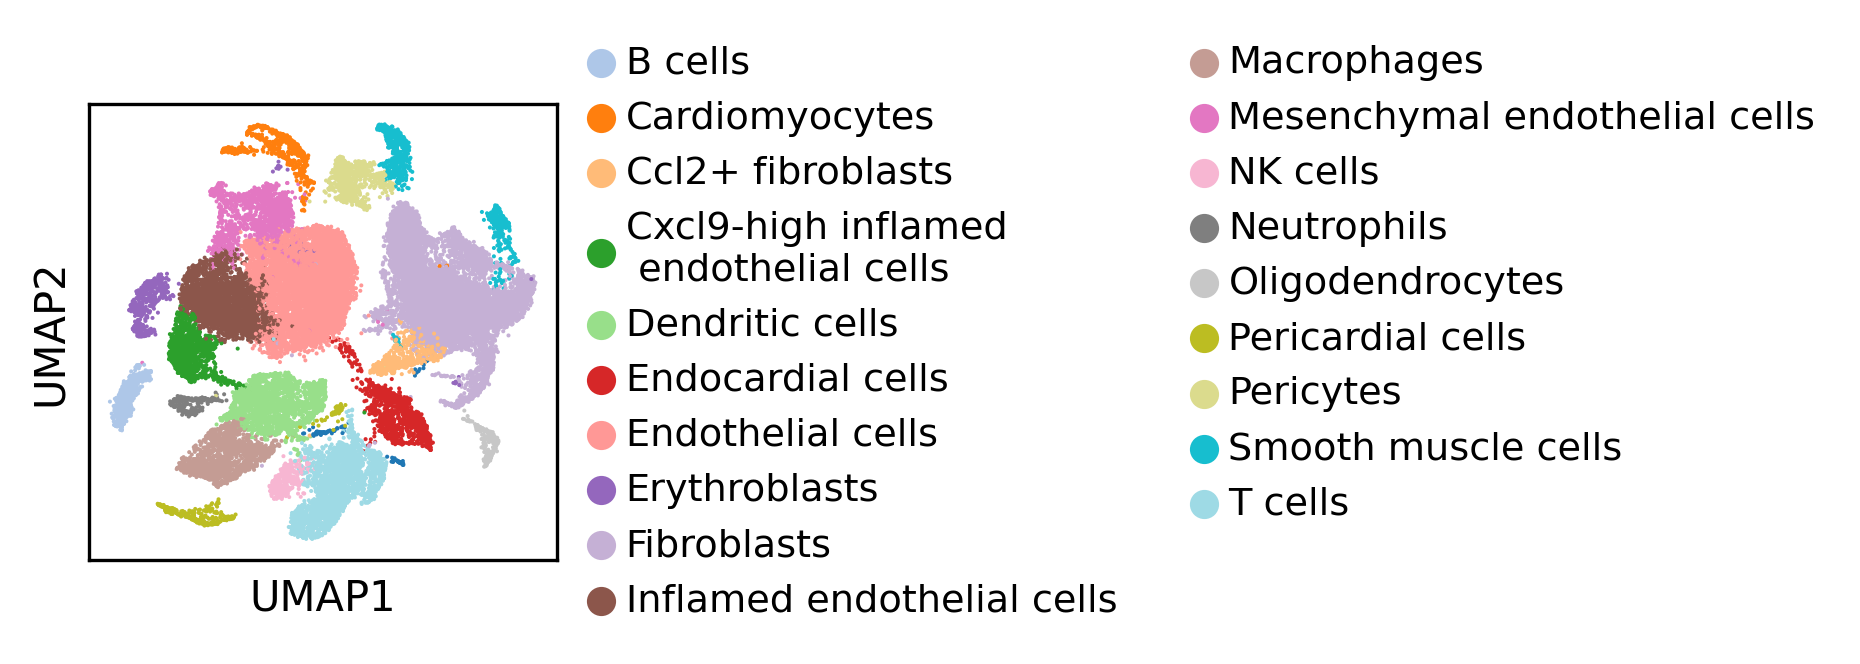

In [113]:
sc.pl.umap(heart_infection_sc, color = ['celltypes_leiden_0.5'], palette="tab20", title="")

In [114]:
clusters_colors = dict(
    zip([str(i) for i in range(20)], heart_infection_sc.uns["celltypes_leiden_0.5_colors"])
)
final_dict = dict(zip(list(heart_infection_sc.obs["celltypes_leiden_0.5"].cat.categories), list(clusters_colors.values())))
final_dict
import pickle
with open('celltypes_leiden_0.5_colors.pickle', 'wb') as handle:
    pickle.dump(final_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [115]:
heart_infection_sc.obs["celltype_groups"] = heart_infection_sc.obs["leiden_0.5"]
celltype_groups = {'0': "Fibroblasts", 
                '1': "Endothelial cells", 
                '2': "Endothelial cells", 
                '3': "T cells",
                '4': "Dendritic cells",
                '5': "Fibroblasts",
                '12': "Smooth muscle cells",
                '13': "Pericytes", 
                '7': "Macrophages", 
                '10': "Endothelial cells",
                '6': "Endothelial cells",
                '9': "Endothelial cells",
                '8': "Endocardial cells",
                '15': "Cardiomyocytes",
                '11': "Fibroblasts",
                '17': "Fibroblasts",
                '14': "Fibroblasts",
                '16': "B cells",
                '18': "Erythroblasts",
                '19': "Pericardial cells",
                '20': "NK cells",
                '21': "Oligodendrocytes",
                '22': "Neutrophils",
                '23': ""}
heart_infection_sc.obs["celltype_groups"] = heart_infection_sc.obs["celltype_groups"].map(celltype_groups).astype("category")

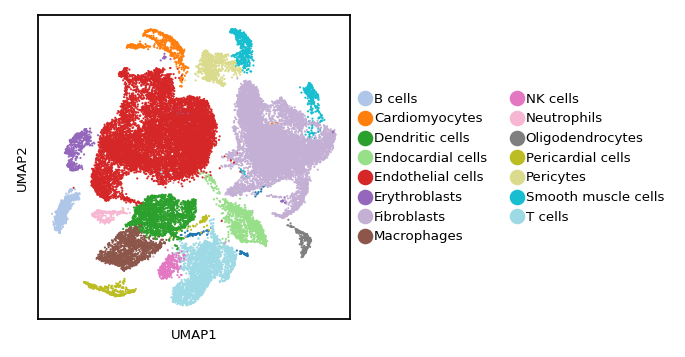

In [116]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc, color = ['celltype_groups'], legend_fontsize=6,  title="", palette="tab20")


In [119]:
heart_infection_sc.write_h5ad(filename="./../../../pyobjs_github/heart_infection_sc_new.h5ad")

In [120]:
heart_infection_sc = heart_infection_sc[~heart_infection_sc.obs["celltype_groups"].isin([""])]

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [121]:
sc.tl.rank_genes_groups(heart_infection_sc, 'celltypes_leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_celltypes_leiden_0.5')

ranking genes


Trying to set attribute `.uns` of view, copying.


    finished: added to `.uns['rank_genes_groups_celltypes_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:01:04)


In [ ]:
# DGE_celltype_groups = pd.DataFrame(heart_infection_sc.uns['rank_genes_groups_celltypes_leiden_0.5']['names']).head(200)
# DGE_celltype_groups.to_csv("DGE_celltypes_leiden_0.5.csv")
result = heart_infection_sc.uns['rank_genes_groups_celltypes_leiden_0.5']
groups = list(result['names'].dtype.names)
dge_results = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names', 'logfoldchanges', 'pvals_adj']}).head(100)
# dge_results.to_csv("./../../../DGE_celltypes_leiden_0.5.csv")

In [71]:
sc.tl.rank_genes_groups(heart_infection_sc, groupby = 'condition', groups= ["T1L-WT_D4PI"],
                        reference= 'Mock_D4PI', key_added='rank_genes_T1L-WT_vs_Mock_D4PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D4PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:19)


In [ ]:
# DGE_D4 = sc.get.rank_genes_groups_df(heart_infection_sc, key='rank_genes_T1L-WT_vs_Mock_D4PI', group=["T1L-WT_D4PI"])
# DGE_D4.to_csv("DGE_D4.csv")
# print(DGE_D4.tail(40))

In [72]:
sc.tl.rank_genes_groups(heart_infection_sc, groupby = 'condition', groups= ["T1L-WT_D7PI"],
                        reference= 'Mock_D7PI', key_added='rank_genes_T1L-WT_vs_Mock_D7PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D7PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:18)


In [ ]:
# DGE_D7 = sc.get.rank_genes_groups_df(heart_infection_sc, key='rank_genes_T1L-WT_vs_Mock_D7PI', group=["T1L-WT_D7PI"])
# DGE_D7.to_csv("DGE_D7.csv")
# print(DGE_D7.tail(40))

In [73]:
sc.tl.rank_genes_groups(heart_infection_sc, groupby = 'condition', groups= ["T1L-WT_D10PI"],
                        reference= 'Mock_D10PI', key_added='rank_genes_T1L-WT_vs_Mock_D10PI',
                        method="wilcoxon")

ranking genes
    finished: added to `.uns['rank_genes_T1L-WT_vs_Mock_D10PI']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


In [ ]:
# DGE_D10 = sc.get.rank_genes_groups_df(heart_infection_sc, key='rank_genes_T1L-WT_vs_Mock_D10PI', group=["T1L-WT_D10PI"])
# DGE_D10.to_csv("DGE_D10.csv")
# print(DGE_D10.tail(40))

In [74]:
# heart_infection_sc.write_h5ad(filename="./../pyobjs_github/heart_infection_sc.h5ad")

In [5]:
heart_infection_sc = sc.read_h5ad(filename="./../../../pyobjs_github/heart_infection_sc.h5ad")

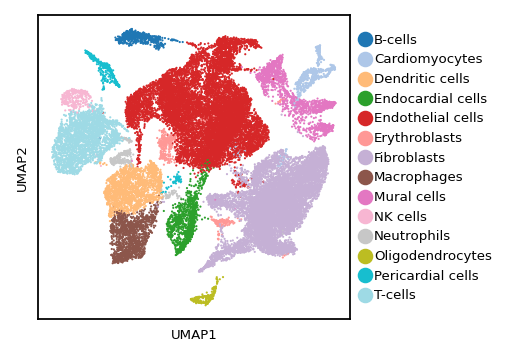

In [7]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc, color = ['celltype_groups'], legend_fontsize=6,  title="", palette="tab20")

In [18]:
heart_infection_sc.obs["celltype_groups_mock_day4"] = heart_infection_sc.obs["celltype_groups"]
heart_infection_sc.obs["celltype_groups_mock_day4"][heart_infection_sc.obs["condition"] != "Mock_D4PI"] = np.nan
heart_infection_sc.obs["celltype_groups_infected_day4"] = heart_infection_sc.obs["celltype_groups"]
heart_infection_sc.obs["celltype_groups_infected_day4"][heart_infection_sc.obs["condition"] != "T1L-WT_D4PI"] = np.nan
heart_infection_sc.obs["celltype_groups_mock_day7"] = heart_infection_sc.obs["celltype_groups"]
heart_infection_sc.obs["celltype_groups_mock_day7"][heart_infection_sc.obs["condition"] != "Mock_D7PI"] = np.nan
heart_infection_sc.obs["celltype_groups_infected_day7"] = heart_infection_sc.obs["celltype_groups"]
heart_infection_sc.obs["celltype_groups_infected_day7"][heart_infection_sc.obs["condition"] != "T1L-WT_D7PI"] = np.nan
heart_infection_sc.obs["celltype_groups_mock_day10"] = heart_infection_sc.obs["celltype_groups"]
heart_infection_sc.obs["celltype_groups_mock_day10"][heart_infection_sc.obs["condition"] != "Mock_D10PI"] = np.nan
heart_infection_sc.obs["celltype_groups_infected_day10"] = heart_infection_sc.obs["celltype_groups"]
heart_infection_sc.obs["celltype_groups_infected_day10"][heart_infection_sc.obs["condition"] != "T1L-WT_D10PI"] = np.nan

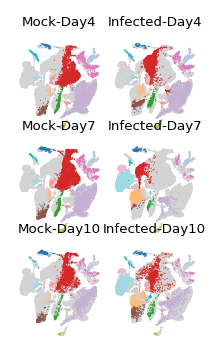

In [33]:
sc.settings.set_figure_params(dpi=80, dpi_save= 1000, fontsize=6, facecolor='white', frameon=True, figsize=(0.75, 0.75), vector_friendly = True, transparent=True, format="pdf")
sc.pl.umap(heart_infection_sc, color = ['celltype_groups_mock_day4', "celltype_groups_infected_day4", "celltype_groups_mock_day7", "celltype_groups_infected_day7", "celltype_groups_mock_day10", "celltype_groups_infected_day10"], legend_loc= "none", size = 1.0, legend_fontsize=6,  title=["Mock-Day4", "Infected-Day4", "Mock-Day7", "Infected-Day7", "Mock-Day10", "Infected-Day10"], palette="tab20", frameon=False, ncols=2, wspace=0.0, hspace=0.1, save="day4_umap")

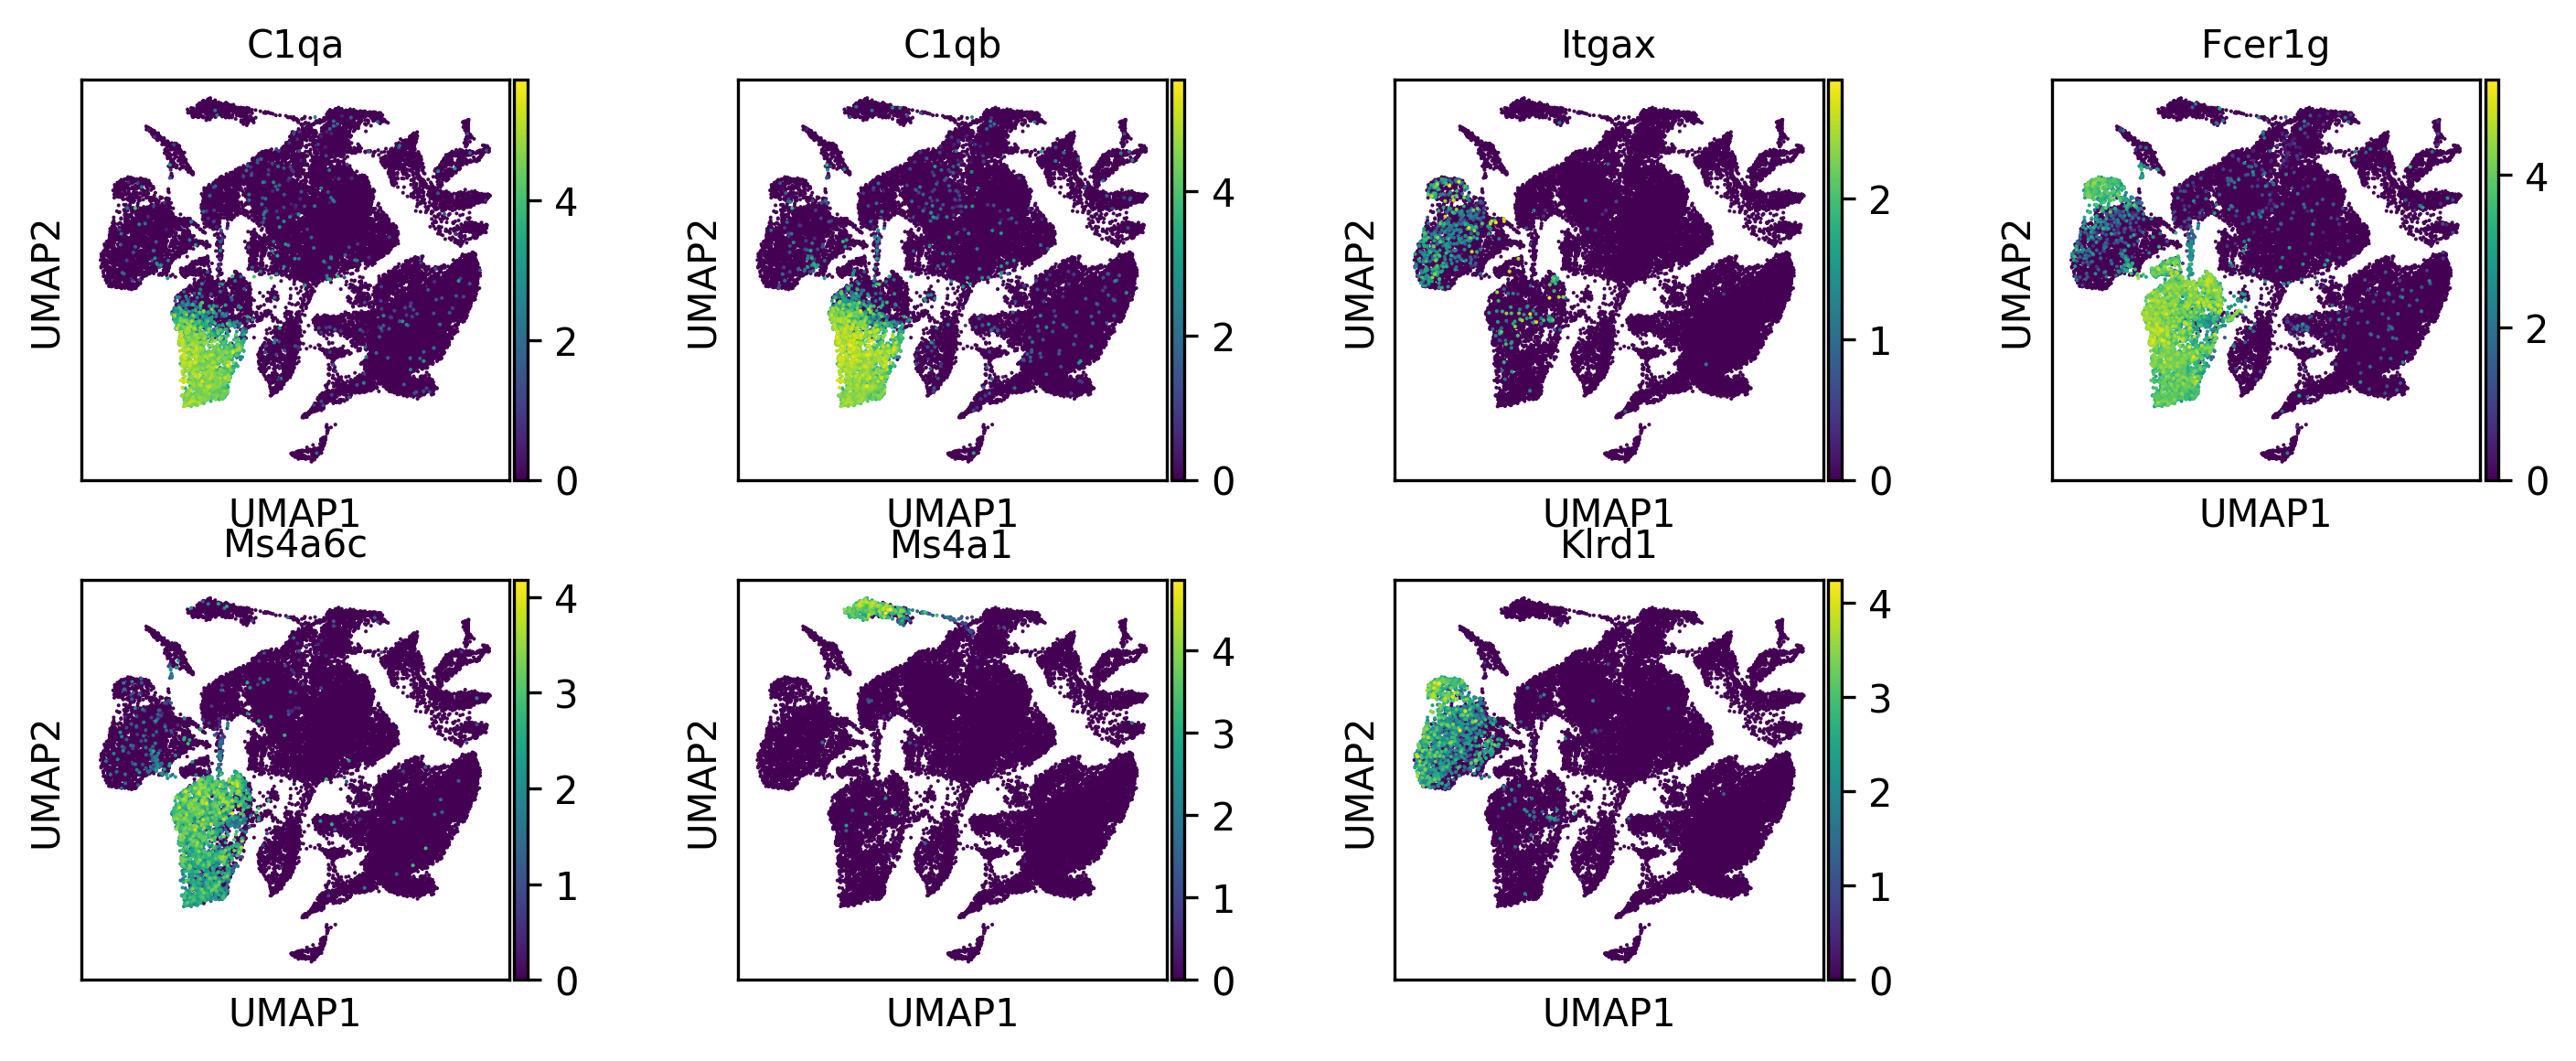

In [55]:
sc.pl.umap(heart_infection_sc, color = ['C1qa', 'C1qb', "Itgax", "Fcer1g", "Ms4a6c", "Ms4a1", "Klrd1"])

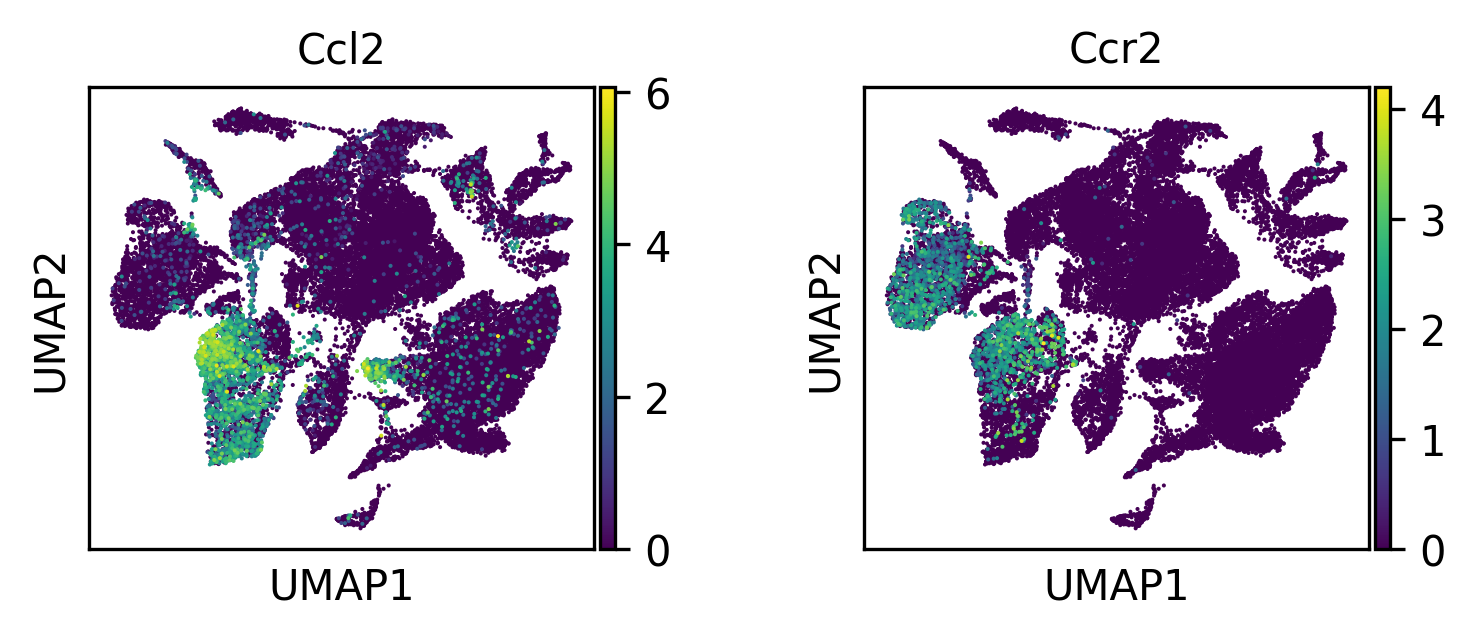

In [52]:
sc.pl.umap(heart_infection_sc, color = ['Ccl2', 'Ccr2'])

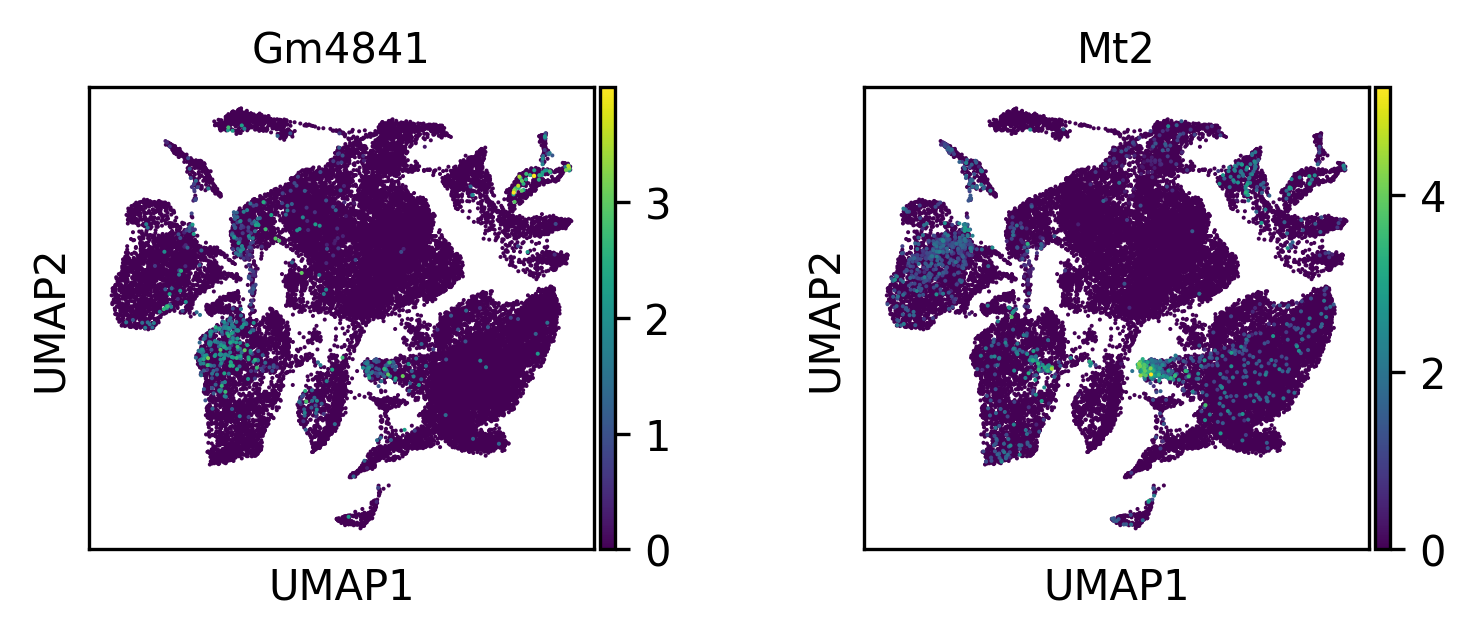

In [56]:
sc.pl.umap(heart_infection_sc, color = ['Gm4841', 'Mt2'])

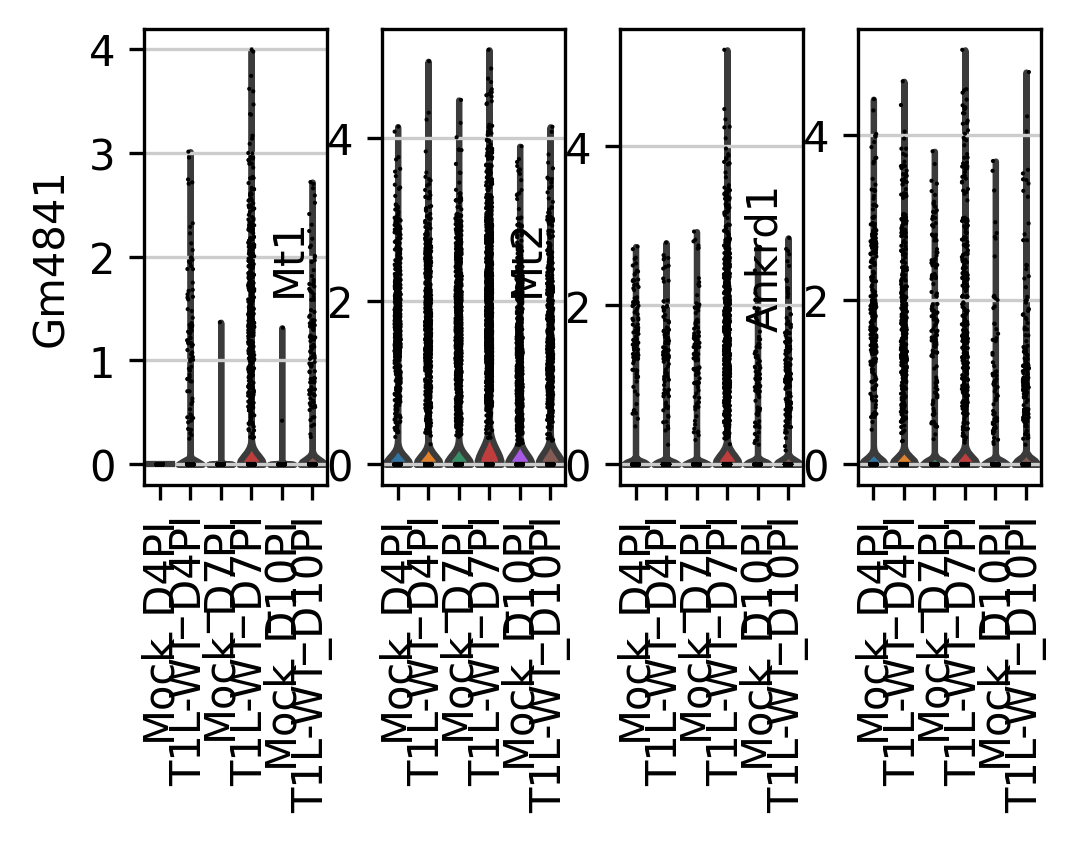

In [60]:
sc.pl.violin(heart_infection_sc, keys=["Gm4841", "Mt1", "Mt2", "Ankrd1"], groupby="condition", rotation=90)